# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 31 октября 2023 23:59

Мягкий дедлайн: 23:59 MSK 14 ноября 2023 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 21 ноября 2023.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 4.8 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [1]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Выведите  количество коэффициентов (веса, они же составляют вектор w) близких к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

In [3]:
from sklearn import linear_model
import numpy as np
reg_l = linear_model.Lasso()
reg_l.fit(X_train, y_train)
# Обучили линейную регрессию с L1 регуляризатором
print(reg_l.coef_)
print(reg_l.intercept_)
# Посмотрели на коэффициенты и сдвиг - reg_l.intercept_
print(np.count_nonzero(reg_l.coef_ == 0))
reg_r = linear_model.Ridge()
reg_r.fit(X_train, y_train)
print(reg_r.coef_)
print(reg_r.intercept_)
# Аналогично для Ridge регрессии
max_for_r = max(abs(max(reg_r.coef_)), abs(min(reg_r.coef_)))
print(np.count_nonzero(abs(reg_r.coef_) < 0.02 * max_for_r))

[  0.           0.         274.33128438  48.57203696   0.
   0.          -0.           0.         424.12142666   0.        ]
152.05468018239867
7
[  20.86588099  -58.00039065  231.2704688   186.67010355   33.31087207
   -2.16994737 -150.95049376  141.35036492  250.75391278  123.18025806]
152.15751264654267
1


Количество коэффициентов, равных нулю, для Lasso: 7. Количество коэффициентов, близких к нулю, для Ridge: 1. Близость к нулю для Ridge регрессии определяется как абсолютная величина коэффициента, меньшая 2% от самой большой абсолютной величины среди всех коэффициентов. bias в графиках не учитывается, он отвечает за сдвиг, а не значимость признаков.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
alphas = np.logspace(-3, 3, num=1000)

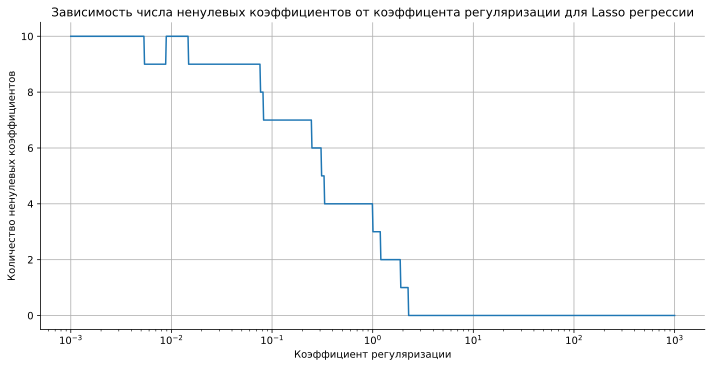

In [5]:
nonsero_coef = []
for al in alphas:
    reg_l = linear_model.Lasso(al)
    reg_l.fit(X_train, y_train)
    nonsero_coef.append(np.count_nonzero(reg_l.coef_ != 0))
sns.relplot(x = alphas, y = nonsero_coef, aspect=2, kind = 'line')
plt.xscale('log')
plt.title('Зависимость числа ненулевых коэффициентов от коэффицента регуляризации для Lasso регрессии')
plt.ylabel('Количество ненулевых коэффициентов')
plt.xlabel('Коэффициент регуляризации')
plt.grid(True)

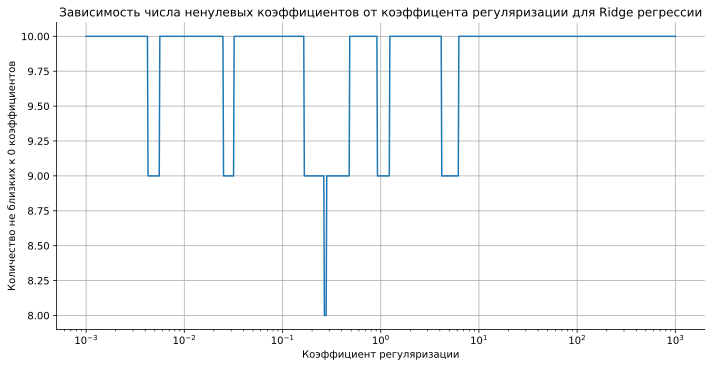

In [6]:
nonsero_coef_2 = []
for al in alphas:
    reg_r = linear_model.Ridge(al)
    reg_r.fit(X_train, y_train)
    max_for_r = max(abs(max(reg_r.coef_)), abs(min(reg_r.coef_)))
    nonsero_coef_2.append(np.count_nonzero(abs(reg_r.coef_) > 0.02 * max_for_r))
sns.relplot(x = alphas, y = nonsero_coef_2, aspect=2, kind = 'line')
plt.xscale('log')
plt.title('Зависимость числа ненулевых коэффициентов от коэффицента регуляризации для Ridge регрессии')
plt.ylabel('Количество не близких к 0 коэффициентов')
plt.xlabel('Коэффициент регуляризации')
plt.grid(True)

Из второго графика видно, что если для Ridge регрессии близость к нулю определять зависимой от максимального модуля, то с увеличением коэффициента регуляризации близких к нулю коэффициентов вообще нет. Поэтому определим близость к нулю как ограничение абсолютной величины коэффициента константой 2.

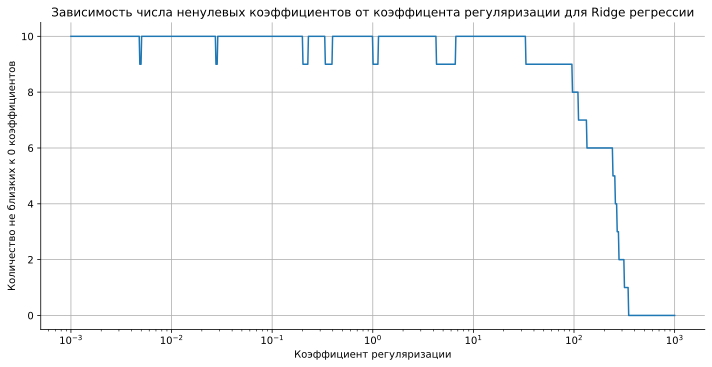

In [7]:
nonsero_coef_2 = []
for al in alphas:
    reg_r = linear_model.Ridge(al)
    reg_r.fit(X_train, y_train)
    nonsero_coef_2.append(np.count_nonzero(abs(reg_r.coef_) > 2))
sns.relplot(x = alphas, y = nonsero_coef_2, aspect=2, kind = 'line')
plt.xscale('log')
plt.title('Зависимость числа ненулевых коэффициентов от коэффицента регуляризации для Ridge регрессии')
plt.ylabel('Количество не близких к 0 коэффициентов')
plt.xlabel('Коэффициент регуляризации')
plt.grid(True)

Теперь видно, что с увеличением коэффициента регуляризации количество близких к нулю коэффициентов возрастает и в конечном счёте достигает 10 (на графиках дана зависимость количества не близких к нулю коэффициентов).
Lasso намного быстрее обнулила коэффициенты при увеличении коэффициента регуляризации, чем Ridge сделала их достаточно малыми по модулю (абсолютная величина меньше 2), это согласуется с ожиданиями, поскольку Lasso стремится обнулять коэффициенты.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [8]:
import sklearn
reg_r = linear_model.Ridge()
reg_r.fit(X_train, y_train)
predict = reg_r.predict(X_test)
print('RMSE = ', "%.5f"%sklearn.metrics.mean_squared_error(y_test, predict) ** 0.5)
print('MAE = ', "%.5f"%sklearn.metrics.mean_absolute_error(y_test, predict))
print('R^2 = ', "%.5f"%sklearn.metrics.r2_score(y_test, predict))

RMSE =  58.30430
MAE =  49.60275
R^2 =  0.35990


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости трех перечисленных выше метрик от коэффициента регуляризации. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

In [9]:
# Подбор лучшего коэффициента регуляризации с сохранением промежуточных результатов для их визуализации на графиках.


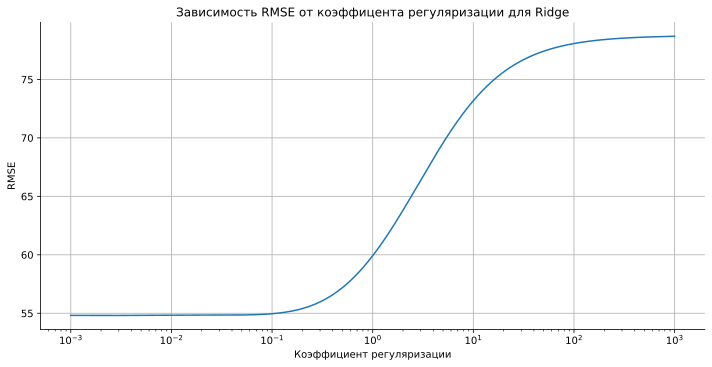

In [10]:
import sklearn.model_selection
for_rmse = sklearn.model_selection.GridSearchCV(reg_r, {'alpha': alphas}, scoring='neg_root_mean_squared_error', cv=sklearn.model_selection.KFold())
for_rmse.fit(X_train, y_train)
sns.relplot(x = alphas, y = abs(for_rmse.cv_results_['mean_test_score']), aspect=2, kind = 'line')
plt.xscale('log')
plt.title('Зависимость RMSE от коэффицента регуляризации для Ridge')
plt.ylabel('RMSE')
plt.xlabel('Коэффициент регуляризации')
plt.grid(True)

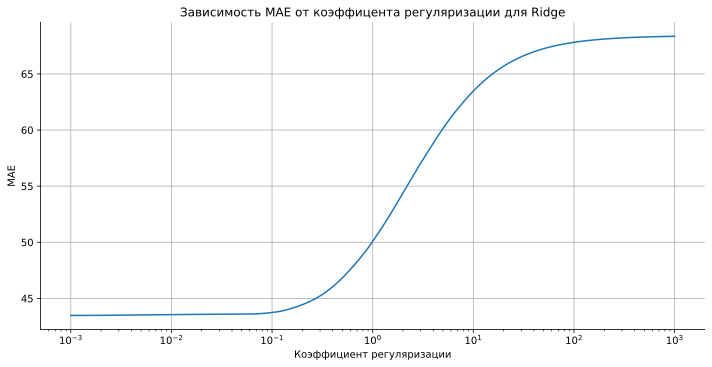

In [11]:
for_mae = sklearn.model_selection.GridSearchCV(reg_r, {'alpha': alphas}, scoring='neg_mean_absolute_error', cv=sklearn.model_selection.KFold())
for_mae.fit(X_train, y_train)
sns.relplot(x = alphas, y = abs(for_mae.cv_results_['mean_test_score']), aspect=2, kind = 'line')
plt.xscale('log')
plt.title('Зависимость MAE от коэффицента регуляризации для Ridge')
plt.ylabel('MAE')
plt.xlabel('Коэффициент регуляризации')
plt.grid(True)

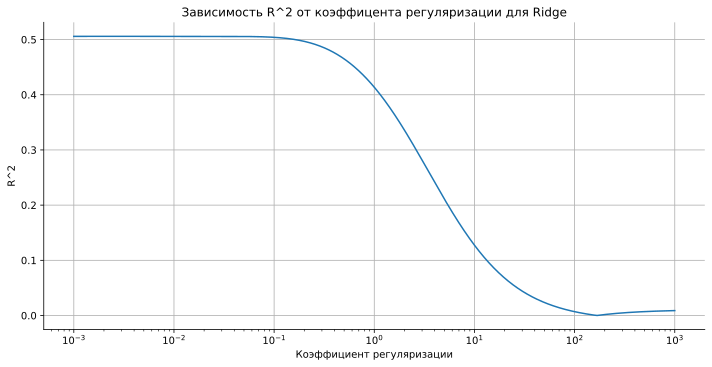

In [12]:
for_r2 = sklearn.model_selection.GridSearchCV(reg_r, {'alpha': alphas}, scoring='r2', cv=sklearn.model_selection.KFold())
for_r2.fit(X_train, y_train)
sns.relplot(x = alphas, y = abs(for_r2.cv_results_['mean_test_score']), aspect=2, kind = 'line')
plt.xscale('log')
plt.title('Зависимость R^2 от коэффицента регуляризации для Ridge')
plt.ylabel('R^2')
plt.xlabel('Коэффициент регуляризации')
plt.grid(True)

In [13]:
best_for_rmse = linear_model.Ridge(alpha=for_rmse.best_params_['alpha']).fit(X_train, y_train)
print("RMSE для лучшего коэффициента регуляризации, равного ", "%.5f" % for_rmse.best_params_['alpha'], ', составляет ', "%.5f" % sklearn.metrics.mean_squared_error(y_test, best_for_rmse.predict(X_test)) ** 0.5)

best_for_mae = linear_model.Ridge(alpha=for_mae.best_params_['alpha']).fit(X_train, y_train)
print("MAE для лучшего коэффициента регуляризации, равного ", "%.5f" % for_mae.best_params_['alpha'], ', составляет ', "%.5f" % sklearn.metrics.mean_absolute_error(y_test, best_for_mae.predict(X_test)))

best_for_r2 = linear_model.Ridge(alpha=for_r2.best_params_['alpha']).fit(X_train, y_train)
print("R^2 для лучшего коэффициента регуляризации, равного ", "%.5f" % for_r2.best_params_['alpha'], ', составляет ', "%.5f" % sklearn.metrics.r2_score(y_test, best_for_r2.predict(X_test)))

RMSE для лучшего коэффициента регуляризации, равного  0.00229 , составляет  55.81338
MAE для лучшего коэффициента регуляризации, равного  0.00125 , составляет  47.14674
R^2 для лучшего коэффициента регуляризации, равного  0.00214 , составляет  0.41334


In [14]:
print("Улучшение качества для RMSE: ", round((1 - 55.81338 / 58.30430) * 1000) / 10, "%", sep = '')
print("Улучшение качества для MAE: ", round((1 - 47.14674 / 49.60275) * 1000) / 10, "%", sep = '')
print("Улучшение качества для R^2: ", round((1 - 0.35990 / 0.41334) * 1000) / 10, "%", sep = '')
print('Таким образом качество улучшилось, пусть и не очень значительно для RMSE и MAE.')

Улучшение качества для RMSE: 4.3%
Улучшение качества для MAE: 5.0%
Улучшение качества для R^2: 12.9%
Таким образом качество улучшилось, пусть и не очень значительно для RMSE и MAE.


__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

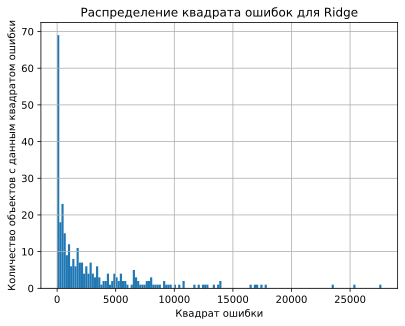

In [15]:
from sklearn.model_selection import cross_val_predict
# Основываясь на результатах предыдущего задания, возьмём коэффициент регуляризации равным среднему из трёх полученных
rid_reg = linear_model.Ridge((0.00229 + 0.00125 + 0.00214) / 3)
plt.hist((cross_val_predict(rid_reg, X_train, y_train) - y_train) ** 2, bins = 150)
plt.title("Распределение квадрата ошибок для Ridge")
plt.xlabel("Квадрат ошибки")
plt.ylabel("Количество объектов с данным квадратом ошибки")
plt.grid(True)

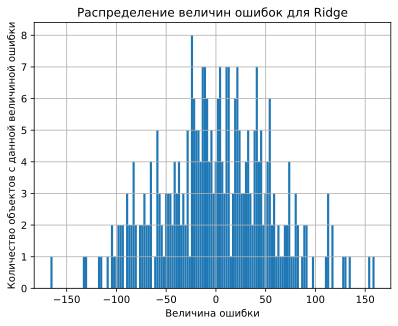

In [16]:
plt.hist((cross_val_predict(rid_reg, X_train, y_train) - y_train), bins = 150)
plt.title("Распределение величин ошибок для Ridge")
plt.xlabel("Величина ошибки")
plt.ylabel("Количество объектов с данной величиной ошибки")
plt.grid(True)

По гистограммам видно, что выбросами нужно считать объекты, величина ошибки на которых по модулю превосходит 105, либо квадрат которой больше 11025. Именно такие объекты формируют "тяжёлые хвосты" распределений. Также видно, что распределение величины ошибки напоминает нормальное, но ошибки, которые равны 40 или -25 делают его менее похожим на нормальное, поэтому такие объекты тоже можно попробовать удалить, посчитав их выбросами.

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [17]:
rid_reg = linear_model.Ridge(0.00229)
errors = (cross_val_predict(rid_reg, X_train, y_train) - y_train) ** 2
X_train_new = X_train[errors <= 11025]
y_train_new = y_train[errors <= 11025]
rid_reg.fit(X_train_new, y_train_new)
print("RMSE для лучшего коэффициента регуляризации, равного 0.00229, составляет ", "%.5f" % sklearn.metrics.mean_squared_error(y_test, rid_reg.predict(X_test)) ** 0.5)
print('Качество ухудшилось')


RMSE для лучшего коэффициента регуляризации, равного 0.00229, составляет  56.53620
Качество ухудшилось


In [18]:
print('Попробуем удалить объекты, ошибка на которых не равна 40.')
rid_reg = linear_model.Ridge(0.00229)
errors = abs(cross_val_predict(rid_reg, X_train, y_train) - y_train)
X_train_new = X_train[errors != 40]
y_train_new = y_train[errors != 40]
rid_reg.fit(X_train_new, y_train_new)
print("RMSE для лучшего коэффициента регуляризации, равного 0.00229, составляет ", "%.5f" % sklearn.metrics.mean_squared_error(y_test, rid_reg.predict(X_test)) ** 0.5)
print('Качество равно исходному(до удаления объектов).')

Попробуем удалить объекты, ошибка на которых не равна 40.
RMSE для лучшего коэффициента регуляризации, равного 0.00229, составляет  55.81345
Качество равно исходному(до удаления объектов).


In [19]:
print('Попробуем удалить объекты, ошибка на которых не равна -25.')
rid_reg = linear_model.Ridge(0.00229)
errors = abs(cross_val_predict(rid_reg, X_train, y_train) - y_train)
X_train_new = X_train[errors != -25]
y_train_new = y_train[errors != -25]
rid_reg.fit(X_train_new, y_train_new)
print("RMSE для лучшего коэффициента регуляризации, равного 0.00229, составляет ", "%.5f" % sklearn.metrics.mean_squared_error(y_test, rid_reg.predict(X_test)) ** 0.5)
print('Качество равно исходному(до удаления объектов).')

Попробуем удалить объекты, ошибка на которых не равна -25.
RMSE для лучшего коэффициента регуляризации, равного 0.00229, составляет  55.81345
Качество равно исходному(до удаления объектов).


**Ответ: таким образом, удаление объектов на основе анализа ошибок на них либо практически не влияет на качество, либо уменьшает его. Это может быть связано с малым размеров выборки, наличием выбросов в тестовой выборке, невозможности по графику сформулировать чёткие критерии для удаляемых объектов.**

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [20]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [21]:
from sklearn.svm import LinearSVC
from sklearn.metrics import auc, precision_recall_curve, roc_auc_score, roc_curve
model = LinearSVC()
model.fit(X_train, y_train)

/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

AUC-ROC =  0.92543
PR-AUC =  0.92437


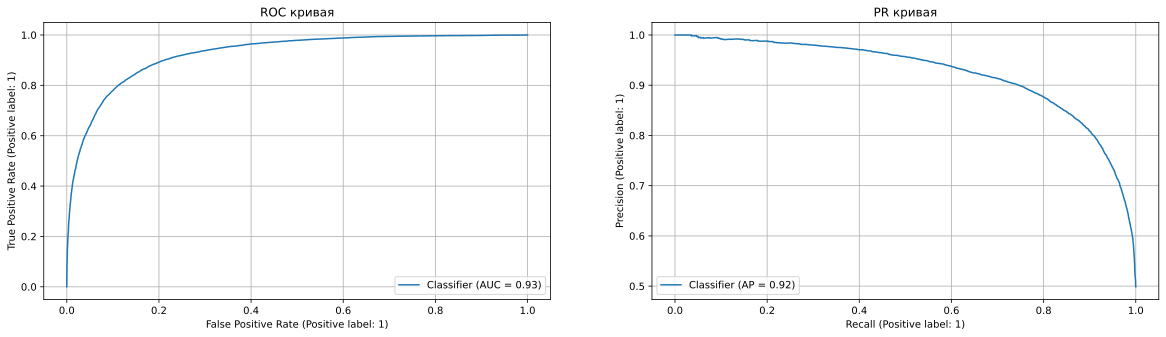

In [22]:
from sklearn.metrics import auc, precision_recall_curve, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].set_title("ROC кривая")
ax[0].grid(True)
ax[1].set_title("PR кривая")
ax[1].grid(True)

y_pred_prob = model.decision_function(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_prob, ax=ax[0])
print('AUC-ROC = ', '%.5f' % roc_auc_score(y_test, y_pred_prob))
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob, ax=ax[1])
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
print('PR-AUC = ', '%.5f' % auc(recall, precision))

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [23]:
x, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, random_state=555)

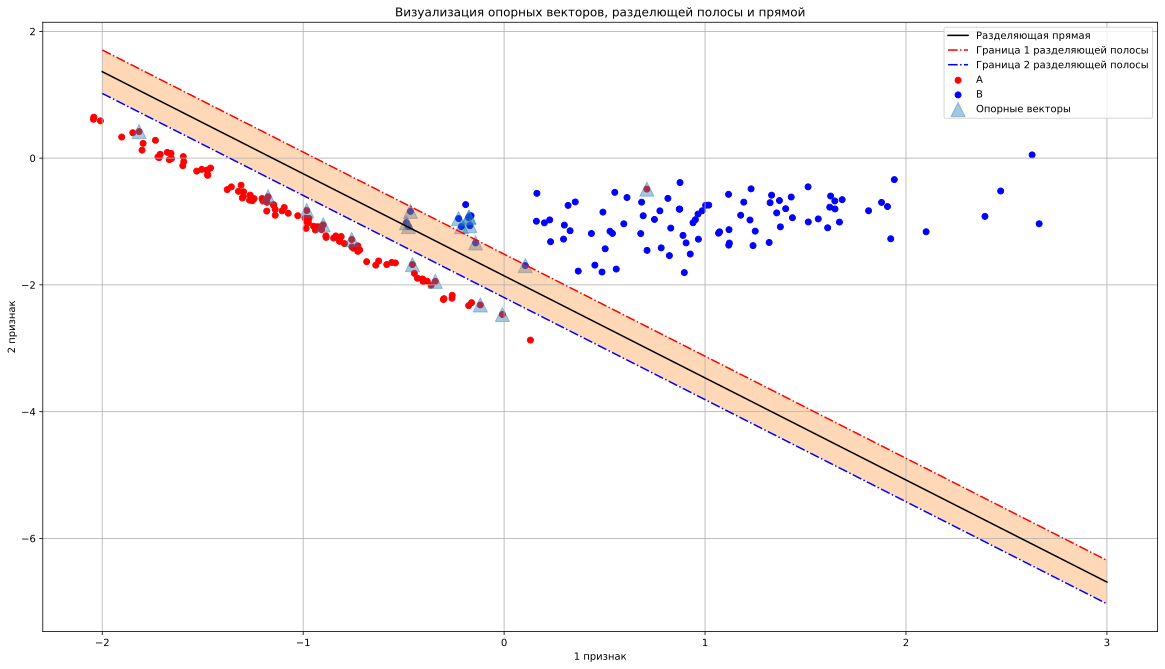

In [24]:
model = sklearn.svm.SVC(kernel='linear')
model.fit(x, y)
plt.figure(figsize=(20, 11))
plt.title("Визуализация опорных векторов, разделющей полосы и прямой")
plt.xlabel("1 признак")
plt.ylabel("2 признак")
plt.grid(True)
x_0 = np.linspace(-2, 3, 6)
w = model.coef_[0]
b = model.intercept_
norm_w = np.linalg.norm(w)
#w[0] * x_0 + w[1] * x_1 + b = 0
y1 = -(x_0 * w[0] + b) / w[1] + 1 / norm_w
y2 = -(x_0 * w[0] + b) / w[1] - 1 / norm_w
y3 = -(x_0 * w[0] + b) / w[1]

plt.plot(x_0, y3, label='Разделяющая прямая', c = 'black')
plt.plot(x_0, y1, linestyle='dashdot', label='Граница 1 разделяющей полосы', c = 'red')
plt.plot(x_0, y2, linestyle='dashdot', label='Граница 2 разделяющей полосы', c = 'blue')

plt.scatter(x[:,0][np.where(y == 0)[0]], x[:,1][np.where(y == 0)[0]], color = 'red', label = "A")
plt.scatter(x[:,0][np.where(y == 1)[0]], x[:,1][np.where(y == 1)[0]], color = 'blue', label = "B")

plt.scatter(x[model.support_, 0], x[model.support_, 1], s=200, alpha=0.4, marker = '^', label='Опорные векторы')
plt.fill_between(x_0, y1, y2, alpha=0.3)
plt.legend(loc="upper right")

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых.

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [25]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) # - -> +
        bin_real_ratios.append((y_test[(preds >= l) & (preds < r)] == 1).sum() / len(y_test[(preds >= l) & (preds < r)])) # min() -> sum() / min() - среднее
    plt.plot(bin_middle_points, bin_real_ratios)

In [26]:
def my_plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) # - -> +
        bin_real_ratios.append((y_test[(preds >= l) & (preds < r)] == 1).sum() / len(y_test[(preds >= l) & (preds < r)])) # min() -> sum() / min() - среднее
    return bin_middle_points, bin_real_ratios

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


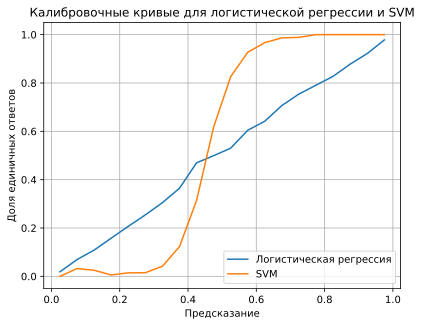

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

model_log = LogisticRegression().fit(X_train, y_train)
model_svm = LinearSVC().fit(X_train, y_train)
regr_proba = model_log.predict_proba(X_test)[:,1]
svm_proba = MinMaxScaler().fit_transform(model_svm.decision_function(X_test).reshape(-1, 1)).ravel()
# Перевели в шкалу вероятностей
ans = my_plot_calibration_curve(y_test, regr_proba)
plt.plot(ans[0], ans[1], label="Логистическая регрессия")
ans = my_plot_calibration_curve(y_test, svm_proba)
plt.plot(ans[0], ans[1], label="SVM")
plt.title("Калибровочные кривые для логистической регрессии и SVM")
plt.xlabel("Предсказание")
plt.ylabel("Доля единичных ответов")
plt.legend(loc="lower right")
plt.grid(True)

Калибровочная кривая для логистической регрессии предсказывает вероятности, в то время как SVM отступ от разделяющей гиперплоскости (степень уверенности, здесь она переведена в вероятность). На гистограмме для SVM видно, что было выдано довольно много ответов, по модулю близких к 0.5. Это не случайно, поскольку этим ответам соотвествуют опорные векторы. Объектов, которые отстоят от разделяющей гиперплоскоти на меньшее по модулю расстояниие, значительно меньше, поскольку они попали в разделяющую полосу. Гистограмма для логистической регрессии показывает, что вероятности, более близкие к 0 или 1, она выдавала значительно чаще, чем между ними.

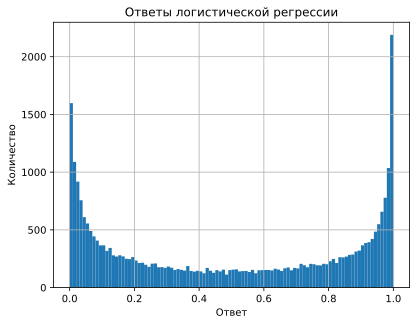

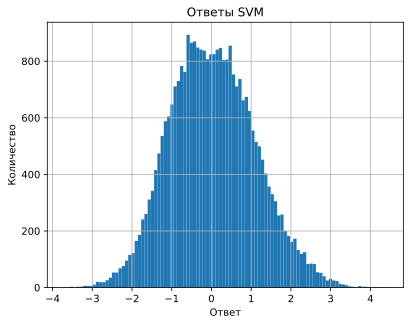

In [28]:

plt.hist(regr_proba, bins=100)
plt.title("Ответы логистической регрессии")
plt.xlabel("Ответ")
plt.ylabel("Количество")
plt.grid(True)
plt.show()
plt.hist(model_svm.decision_function(X_test), bins=100)
plt.title("Ответы SVM")
plt.xlabel("Ответ")
plt.ylabel("Количество")
plt.grid(True)
plt.show()

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dua

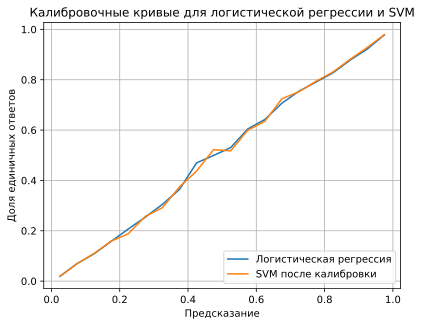

In [29]:
from sklearn.calibration import CalibratedClassifierCV

model_svm_calib = CalibratedClassifierCV(model_svm, cv=6).fit(X_train, y_train)
ans = my_plot_calibration_curve(y_test, regr_proba)
plt.plot(ans[0], ans[1], label="Логистическая регрессия")
ans = my_plot_calibration_curve(y_test, model_svm_calib.predict_proba(X_test)[:,1])
plt.plot(ans[0], ans[1], label="SVM после калибровки")
plt.title("Калибровочные кривые для логистической регрессии и SVM")
plt.xlabel("Предсказание")
plt.ylabel("Доля единичных ответов")
plt.legend(loc="lower right")
plt.grid(True)

Калибровочная кривая для SVM стала охожа на диагональ, это значит, что модель откалибровалась, теперь она предсказывает не степень уверенности, а корректные вероятности (вероятность равна доле объектов положительного класса)

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [30]:
# Я буду применять сигмоидный метод, предполагающий, что калибровочная кривая может быть скорректирована путём применения сигмоидной функции к необр. прогнозам.
class MyCalibrated:
  def __init__(self, model):
    self.model = model
    self.ideal = np.array([(2 * i + 1) / 40 for i in range(20)]) # точки берутся посередине малых отрезков
    # Сохраняем саму модель и диагонать, к которой нужно стремиться приблзить калибровочную кривую при обучении.

  def fit(self, X_train, y_train):
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
    # Переданную для обучения выборку делим на обучающую и тестовую.
    decision = self.model.fit(X_train, y_train).decision_function(X_test)
    # Получаем решение модели на тестовой выборке
    min_error = 100
    # Будем минимизировать ошибку
    for A in np.linspace(-20, 20, 500):
      for B in np.linspace(-20, 20, 500):
        # Перебор комбинаций параметров
        prob = 1 / (1 + np.exp(A * decision + B))
        # Применяем сигмоидную функцию с перебираемыми параметрами к необработанным прогнозам модели
        fact = [(y_test[(prob >= i / 20) & (prob < (i + 1) / 20)] == 1).sum() / len(y_test[(prob >= i / 20) & (prob < (i + 1) / 20)]) for i in range(20)]
        # Строим получившуюся кривую по 20 отрезкам
        error = ((self.ideal - fact) ** 2).sum()
        # Вычисляем величину ошибки (разница с диагональю)
        if min(error, min_error) < min_error:
          min_error = error
          self.best = A, B
          # Если разница уменьшилась, сохраняем параметры сигмоидной функции

  def predict_proba(self, X_test):
    return 1 / (1 + np.exp(self.best[0] * self.model.decision_function(X_test) + self.best[1]))
    # Модель выдаёт вероятности с помощью сигмоидной функции для подобранных лучших параметров




/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/dg/hzy7hh_s4ds9lspj4d52_lf00000gn/T/ipykernel_91294/3793518849.py:20: RuntimeWarning: invalid value encountered in scalar divide
  fact = [(y_test[(prob >= i / 20) & (prob < (i + 1) / 20)] == 1).sum() / len(y_test[(prob >= i / 20) & (prob < (i + 1) / 20)]) for i in range(20)]


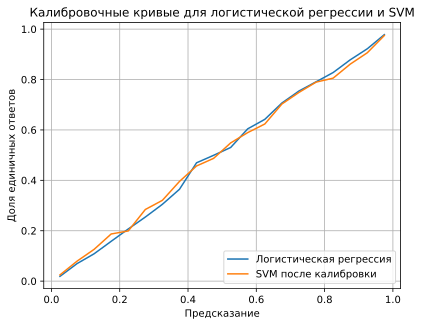

In [31]:

model_svm_calib = MyCalibrated(LinearSVC())
model_svm_calib.fit(X_train, y_train)
ans = my_plot_calibration_curve(y_test, regr_proba)
plt.plot(ans[0], ans[1], label="Логистическая регрессия")
ans = my_plot_calibration_curve(y_test, model_svm_calib.predict_proba(X_test))
plt.plot(ans[0], ans[1], label="SVM после калибровки")
plt.title("Калибровочные кривые для логистической регрессии и SVM")
plt.xlabel("Предсказание")
plt.ylabel("Доля единичных ответов")
plt.legend(loc="lower right")
plt.grid(True)

Калибровочная кривая, полученная с помощью моей функции калибровки вероятностей, близка к диагонали, значит, функция работает корректно.

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [32]:
!wget  -O 'train.csv' -q 'https://www.dropbox.com/scl/fi/8psszo0n3xcyqogs6laam/train.csv?rlkey=gr2kysdmh15i7nrnovgg561vk&dl=0'
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [33]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [34]:
model  = LogisticRegression().fit(X_train, y_train)
predict = model.predict(X_test)

/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

AUC-ROC =  0.62368
PR-AUC =  0.61227


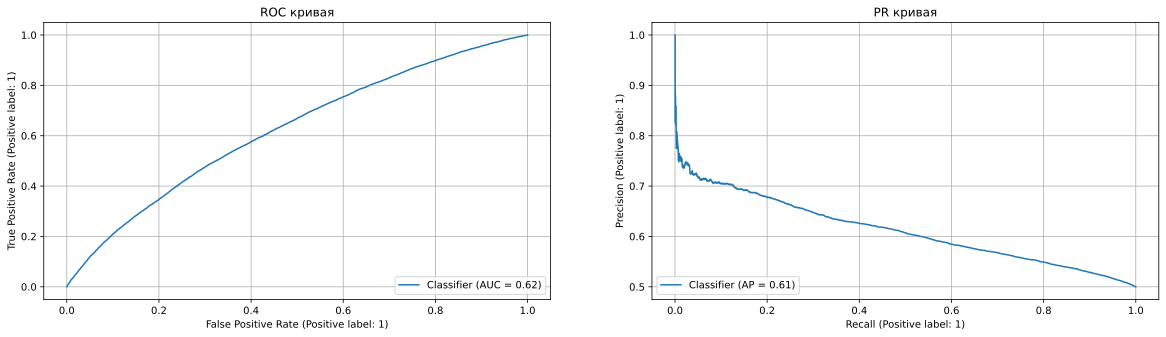

In [35]:
from sklearn.metrics import auc, precision_recall_curve, roc_auc_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].set_title("ROC кривая")
ax[0].grid(True)
ax[1].set_title("PR кривая")
ax[1].grid(True)

y_pred_prob = model.decision_function(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_prob, ax=ax[0])
print('AUC-ROC = ', '%.5f' % roc_auc_score(y_test, y_pred_prob))
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob, ax=ax[1])
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
print('PR-AUC = ', '%.5f' % auc(recall, precision))

Ответ: Значение AUC-ROC немногим больше значения 0.5, которое соответствует случайному классификатору, т. е. бесполезному. Значение PR-AUC ещё меньше отличается от 0.5, соотвующего бесполезному классификатору. Анализ Precision-recall кривой: будем двигаться из левого верхнего угла: при значении точности почти 1 полнота практически нулевая, но стоит чуть увеличить полноту, как резко падает точность.

Интерпретация точности 1: каждый водитель, отнесённый к тому, кто воспользуется страховкой, действительно ей воспользуется, но ничего не ясно о количестве водителей, которые воспользуются страховкой, не отнесённых классификатором к таковым (можем понести большие убытки, выдав страховку тем, про которых думаем, что они не придут за деньгами).
Интерпретация полноты 1: каждый водитель, который воспользуется страховкой действительно классифицирован правильно, но ничего не ясно о количестве водителей, которые не воспользуются страховкой, но которых классификатор посчитал теми, кто ей воспользуется (можем потерять прибыль, если откажем им).

Таким образом модель работает плохо, она показывает низкое качество. ДТП зависит не только от самого водителя, но от множества сторонних факторов, которые нельзя получить из признаков.

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newt

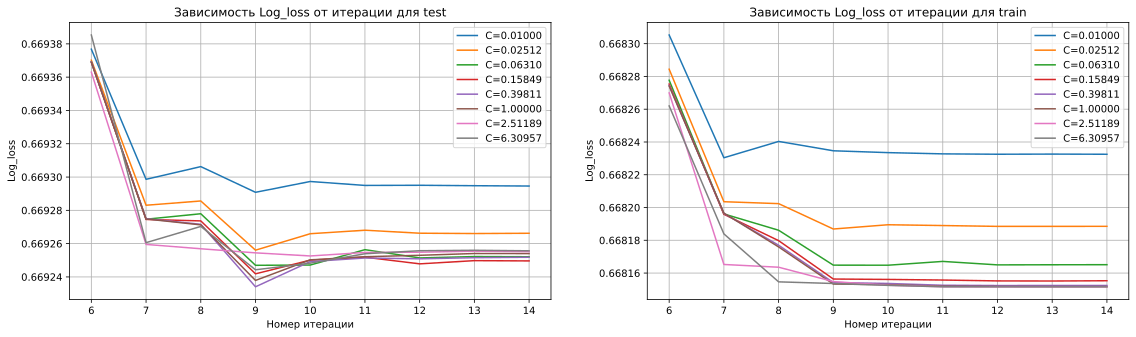

In [36]:
plt.figure(figsize=(19, 5))
plt.subplot(1, 2, 1)
plt.title("Зависимость Log_loss от итерации для test")
plt.legend(loc="upper right")
plt.ylabel("Log_loss")
plt.xlabel("Номер итерации")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.title("Зависимость Log_loss от итерации для train")
plt.legend(loc="upper right")
plt.ylabel("Log_loss")
plt.xlabel("Номер итерации")
plt.grid(True)
sign_iters = [6, 7, 8, 9, 10 ,11, 12, 13, 14]
for alpha in np.logspace(-2, 0.8, num=8):
  model = LogisticRegression(C=alpha, max_iter=1, warm_start=True, solver='newton-cg')
  # max_iter=1 - чтобы делалась только 1 итерация при warm_start=True, т е предыдущее решение не удалять -
  # возможность визуализировать по шагам
  # solver по умолчанию 'liblinear', заменим на 'newton-cg' как наиболее оптимальный метод оптимизации для данной задачи и данных -
  # обработка только L2 штрафа и выдача наиболее интепретируемого результата по сравнению
  # с другими значениями (убывающий Log_loss и изменение зависимости Log_loss от итерации для разных С)
  train_losses = []
  test_losses = []
  for i in range(6):
    model.fit(X_train, y_train) # Первые 6 шагов дают очень большой log_loss, что на графике не даёт возможность оценить последующие, не будем визуализировать первые 6 шагов
  for i in range(9):
    model.fit(X_train, y_train)
    test_losses.append(sklearn.metrics.log_loss(y_test, model.predict_proba(X_test)))
    train_losses.append(sklearn.metrics.log_loss(y_train, model.predict_proba(X_train)))
  plt.subplot(1, 2, 1)
  plt.plot(sign_iters, test_losses, label=f"C={alpha:.5f}")
  plt.legend(loc="upper right")
  plt.subplot(1, 2, 2)
  plt.plot(sign_iters, train_losses, label=f"C={alpha:.5f}")
  plt.legend(loc="upper right")
plt.show()

Самым лучшим значением С является 0.15849 (для выбранной логарифмической сетки, возможно, если перебирать альфа с более малым шагом, лучшее значение изменится, но оно всё равно будет ближе к 0.15849, чем к любым другим, рассмотренным здесь). Для обучающей выборки лучшими значениями являются самые большие С - эффект переобучения, поскольку С обратно пропорциональна коэффициенту регуляризации, с увеличением С регуляризация ослабевает - модель подстраивается под данные.

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [37]:
np.random.seed(555)
roc_auc_score(y_test, LogisticRegression().fit(X_train, y_train).predict_proba(X_test)[:, 1]) # класс1

/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6236752121809231

__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [38]:
import time
model = LogisticRegression()
categorical = [x for x in X_train.columns if 'cat' in x]
# постфикс 'bin' тоже говорит о принадлежности к категориальным признакам, но я его не кодирую, поскольку он бинарный
X_train_new = pd.get_dummies(X_train, columns=categorical)
X_test_new = pd.get_dummies(X_test, columns=categorical)
start = time.time()
model.fit(X_train_new, y_train)
print('Время на обучение модели: ', round((time.time() - start) * 100) / 100, 's')
print("ROC-AUC после one-hot-кодирования:" ,"%.5f" % roc_auc_score(y_test, model.predict_proba(X_test_new)[:, 1]))
# Качество повысилось

Время на обучение модели:  2.62 s
ROC-AUC после one-hot-кодирования: 0.63268


/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [39]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()
for name in categorical:
      g = {k: (y_train[X_train[name] == k].sum()) / ((X_train[name] == k).sum()) + np.random.normal(0, 0.05) for k in np.unique(X_train[name])}
      X_train_new[name] = X_train_new[name].map(g)
      X_test_new[name] = X_test_new[name].map(g)

start = time.time()
model = LogisticRegression().fit(X_train_new, y_train)
print('Время на обучение модели: ', round((time.time() - start) * 100) / 100, 's')
print("ROC-AUC после использования счётчиков:" ,"%.5f" % roc_auc_score(y_test, model.predict_proba(X_test_new)[:, 1]))
# Качество даже чуть ухудшилось по сравнению с исходным состоянием (задание 5)
# Заметим, что время на обучение модели затратилось меньше, чем при one-hot-кодировании, поскольку количество признаков не увеличилось.

Время на обучение модели:  1.42 s
ROC-AUC после использования счётчиков: 0.62309


/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Ответ: Использование one-hot-кодирования улучшает качество модели, но увеличивает время обучения из-за возрастания количества признаков, если количество признаков будет большим (не как в этой задаче), то время изменится не на 1.5 s, а на более значительную величину. Время обучения модели после кодирования категориальных переменных с помощью счётчиков остается таким же, как и до кодирования. Это объясняется тем, что новые признаки не добавляются, а меняются только значения, поэтому вычислительная сложность остаётся на том же уровне. Возможно, на других данных кодирование с помощью счётчиков увеличило бы качество.**

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум).

__(+0.5 балла)__

In [40]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()
i = 0
for index, row in X_train_new.iterrows():
    if i == 0:
       X_train_new[name][i:i + 1] = 0
       continue
    for name in categorical:
      g = {k: (y_train[X_train[name][:i] == k].sum()) / ((X_train[name][:i] == k).sum()) + np.random.normal(0, 0.05) for k in np.unique(X_train[name][:i])}
      X_train_new[name][i:i + 1] = X_train_new[name][i:i + 1].map(g)
    i += 1

for name in categorical:
      g = {k: (y_train[X_train[name] == k].sum()) / ((X_train[name] == k).sum()) + np.random.normal(0, 0.05) for k in np.unique(X_train[name])}
      X_test_new[name] = X_test_new[name].map(g)
      # Тест кодируем по всему трейну

start = time.time()
model = LogisticRegression().fit(X_train_new, y_train)
print('Время на обучение модели: ', round((time.time() - start) * 100) / 100, 's')
print("ROC-AUC после использования счётчиков, использовались объекты, расположенные выше:" ,"%.5f" % roc_auc_score(y_test, model.predict_proba(X_test_new)[:, 1]))
# Данный способ показал самое худшее качество среди всех способов со счётчиками, рассмотренных выше.

/var/folders/dg/hzy7hh_s4ds9lspj4d52_lf00000gn/T/ipykernel_91294/1429818184.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new[name][i:i + 1] = 0


Время на обучение модели:  1.39 s
ROC-AUC после использования счётчиков, использовались объекты, расположенные выше: 0.60734


/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке.

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [41]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()
for name in categorical:
      g = {k: (y_train[X_train[name] == k].sum() + 10 * np.mean(y_train)) / ((X_train[name] == k).sum() + 10) + np.random.normal(0, 0.05) for k in np.unique(X_train[name])}
      X_train_new[name] = X_train_new[name].map(g)
      X_test_new[name] = X_test_new[name].map(g)

start = time.time()
model = LogisticRegression().fit(X_train_new, y_train)
print('Время на обучение модели: ', round((time.time() - start) * 100) / 100, 's')
print("ROC-AUC после использования счётчиков со сглаживанием:" ,"%.5f" % roc_auc_score(y_test, model.predict_proba(X_test_new)[:, 1]))
# Качество одно из самых низких среди всех способов со счётчиками.

Время на обучение модели:  1.51 s
ROC-AUC после использования счётчиков со сглаживанием: 0.61545


/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ: Плюсы: не добавляются новые признаки, а модифицируются существующие, что оставляет неизменным время работы; модифицируемость модели(можно изменять шум, степень сглаживания, придумывать новые способы подсчёта счётчиков). Минусы: не всегда улучшается качество; риск утечки целевой переменной; изменение смысла признака(категориальный признак заменяется значением целевой переменной).**

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [42]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [43]:
X_train_new = pd.get_dummies(X_train, columns=categorical)
X_test_new = pd.get_dummies(X_test, columns=categorical)
print("Количество признаков:", len(X_train_new.columns))
# Исходные колонки удалились (они заменились)

Количество признаков: 227


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [44]:

start = time.time()
model = LogisticRegression().fit(X_train_new, y_train)
print('Время на обучение модели: ', round((time.time() - start) * 100) / 100, 's')
print("ROC-AUC:" ,"%.5f" % roc_auc_score(y_test, model.predict_proba(X_test_new)[:, 1]))

Время на обучение модели:  9.44 s
ROC-AUC: 0.63645


/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [45]:
start = time.time()
ind = X_train_new.columns[np.argsort(np.abs(model.coef_))[0][::-1][0:200]]
print('Время отбора признаков: ', round((time.time() - start) * 100) / 100, 's')
start = time.time()
model = LogisticRegression().fit(X_train_new[ind], y_train)
print('Время на обучение модели: ', round((time.time() - start) * 100) / 100, 's')
print("ROC-AUC:" ,"%.5f" % roc_auc_score(y_test, model.predict_proba(X_test_new[ind])[:, 1]))
# Время обучения c 200 признаками уменьшилось, поскольку признаков стало меньше, качество практически не изменилось
# Суммарное время обучения модели с 200 лучшими признаками складывается из обучения исходной модели: 10.26 сек (для определения коэффициентов), отбора признаков: 0 сек, обучения модели с 200 лучшими признаками: 8.77 сек.
# Итого 19.03 сек

Время отбора признаков:  0.0 s


Время на обучение модели:  7.75 s
ROC-AUC: 0.63857


/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки.

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [46]:
from sklearn.preprocessing import StandardScaler
start = time.time()
X_train_new_scaled = X_train_new.copy()
X_test_new_scaled = X_test_new.copy()
X_train_new_scaled[X_test_new.columns] = StandardScaler().fit_transform(X_train_new[X_test_new.columns])
X_test_new_scaled[X_test_new.columns] = StandardScaler().fit_transform(X_test_new[X_test_new.columns])


model = LogisticRegression().fit(X_train_new_scaled, y_train)
print('Время на обучение модели: ', round((time.time() - start) * 100) / 100, 's')
print("ROC-AUC:" ,"%.5f" % roc_auc_score(y_test, model.predict_proba(X_test_new_scaled)[:, 1]))

start = time.time()
ind = X_train_new.columns[np.argsort(np.abs(model.coef_))[0][::-1][0:200]]
print('Время отбора признаков: ', round((time.time() - start) * 100) / 100, 's')
start = time.time()
model = LogisticRegression().fit(X_train_new_scaled[ind], y_train)
print('Время на обучение модели c 200 признаками: ', round((time.time() - start) * 100) / 100, 's')
print("ROC-AUC для 200 лучших признаков:" ,"%.5f" % roc_auc_score(y_test, model.predict_proba(X_test_new_scaled[ind])[:, 1]))

Время на обучение модели:  9.55 s
ROC-AUC: 0.63804
Время отбора признаков:  0.0 s
Время на обучение модели c 200 признаками:  6.2 s
ROC-AUC для 200 лучших признаков: 0.63800


Качество для отнормированных признаков и 200 отнормированных признаков примерно одинаковое, но если сравнивать все исходные признаки и все отнормированные признаки, 200 лучших исходных признаков и 200 лучших отнормированных признаков, то качество в обоих случаях улучшилось. Значит, масштабировать признаки полезно.

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods.

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

In [47]:
start = time.time()
class__ = X_train_new_scaled[y_train == 0]
class_plus = X_train_new_scaled[y_train == 1]
t = np.abs(np.mean(class_plus) - np.mean(class__)) / np.sqrt((len(class_plus) * np.std(class_plus) ** 2 + len(class__) * np.std(class__) ** 2) / (len(class_plus) + len(class__)))
ind = t[np.argsort(t)[::-1]][:200].index
model = LogisticRegression().fit(X_train_new_scaled[ind], y_train)
print('Время на обучение модели с применением фильтрации: ', round((time.time() - start) * 100) / 100, 's')
print("ROC-AUC:" ,"%.5f" % roc_auc_score(y_test, model.predict_proba(X_test_new_scaled[ind])[:, 1]))

/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Время на обучение модели с применением фильтрации:  6.69 s
ROC-AUC: 0.63856


### Методы-обёртки

__Задание 10.__

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [48]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train_new_scaled, y_train, train_size=10000)

start = time.time()
res = []
# В res будет хранить качество модели обученной без одного какого-то признака
model = LogisticRegression()
for tmp in X_train_2.columns:
  model.fit(X_train_2.drop(columns=[tmp]), y_train_2)
  res.append(roc_auc_score(y_test_2, model.predict_proba(X_test_2.drop(columns=[tmp]))[:, 1]))
ind = X_train_new_scaled.columns[np.argsort(res)[:200]]
# Берём 200 признаков, без которых всех больше понижалось качество
model.fit(X_train_new_scaled[ind], y_train)
# Финальное обучение на отобранных 200 признаках и оценка качества на исходной тестовой выборке.
print('Время обучения модели c отбором признаков: ', round((time.time() - start) * 100) / 100, 's')
print("ROC-AUC:" ,"%.5f" % roc_auc_score(y_test, model.predict_proba(X_test_new_scaled[ind])[:, 1]))

/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Время обучения модели c отбором признаков:  168.88 s
ROC-AUC: 0.63576


Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ: Встроенный метод без нормирования:
         Время обучения с отбором:  19.0 s
         ROC-AUC: 0.63857
         Встроенный метод с нормированием:
         Время обучения с отбором:  15.27 s
         ROC-AUC: 0.63800
         Преимущества: простота и понятность реализации
         Недостатки: нужно 2 раза обучать модель
         Фильтрация:
         Время обучения с отбором:  6.31 s
         ROC-AUC: 0.63856
         Преимущества: скорость работы
         Недостатки: подбор формулы
         Обёртка:
         Время обучения модели c отбором признаков:  147.875 s
         ROC-AUC: 0.63856
         Преимущества: простота и понятность реализации
         Недостатки: очень высокое время работы
         Все методы показали примерно одинаковое качество, нельзя выделить какой-то один как наилучший**

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку.

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты.

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000.

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [49]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [50]:
print("Доля положительных объектов: ", "%.5f" % (target.sum() / len(target)))
# Аварии - это довольно редкое явление для любого водителя

Доля положительных объектов:  0.03645


Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [51]:
categorical = [x for x in X_train.columns if 'cat' in x]
X_train_new = pd.get_dummies(X_train, columns=categorical)
X_test_new = pd.get_dummies(X_test, columns=categorical)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [52]:
model = LogisticRegression()
model.fit(X_train_new, y_train)
pred = model.predict_proba(X_test_new)[:, 1]

/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [53]:
print("ROC-AUC:" ,"%.5f" % roc_auc_score(y_test, pred))
# Значение AUC-ROC немногим больше значения 0.5, которое соответствует случайному классификатору, т. е. бесполезному. Очень сложно предсказать аварию по признакам, она зависит и от сторонних факторов.

ROC-AUC: 0.63645


Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

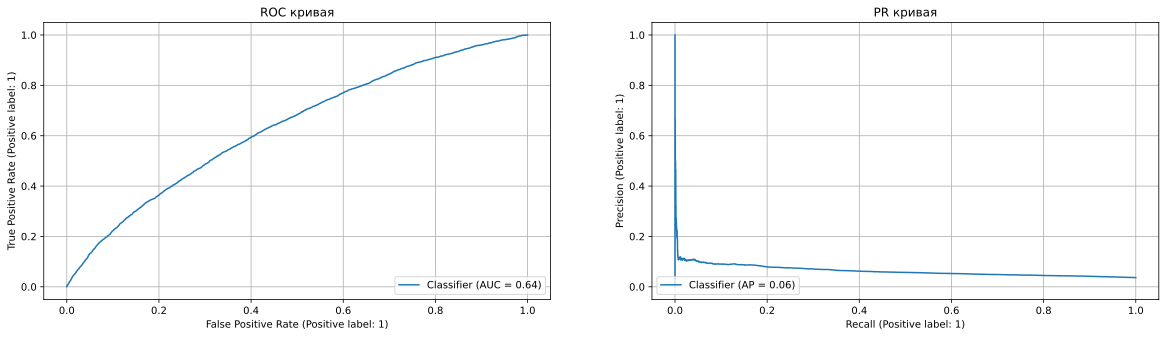

In [54]:
from sklearn.metrics import auc, precision_recall_curve, roc_auc_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].set_title("ROC кривая")
ax[0].grid(True)
ax[1].set_title("PR кривая")
ax[1].grid(True)

y_pred_prob = model.decision_function(X_test_new)
RocCurveDisplay.from_predictions(y_test, y_pred_prob, ax=ax[0])
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob, ax=ax[1])
# Построили ещё и ROC кривую.

Анализ Precision-recall кривой: будем двигаться из левого верхнего угла: при значении точности почти 1 полнота практически нулевая, но стоит чуть увеличить полноту, как резко падает точность.

Интерпретация точности 1: каждый водитель, отнесённый к тому, кто воспользуется страховкой, действительно ей воспользуется, но ничего не ясно о количестве водителей, которые воспользуются страховкой, не отнесённых классификатором к таковым (можем понести большие убытки, выдав страховку тем, про которых думаем, что они не придут за деньгами).
Интерпретация полноты 1: каждый водитель, который воспользуется страховкой действительно классифицирован правильно, но ничего не ясно о количестве водителей, которые не воспользуются страховкой, но которых классификатор посчитал теми, кто ей воспользуется (можем потерять прибыль, если откажем им).

Таким образом модель работает плохо, она показывает низкое качество. ДТП зависит не только от самого водителя, но от множества сторонних факторов, которые нельзя получить из признаков.

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [55]:
# solver='lbfgs'
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_new, y_train)
y_train_pred = model.predict_proba(X_train_new)[:, 1]

for thereshold in np.linspace(0, 1, 100):
  res = y_train_pred > thereshold
  # Количество положительных предсказаний
  count_plus = res.sum() + 0.00000001
  # Количество обратившихся
  count_fact = y_train[res == 1].sum()
  if count_fact / count_plus >= 0.95:
    answer = thereshold

print("Порог вероятности для solver='lbfgs':", "%.5f" %answer)
y_test_pred = model.predict_proba(X_train_new)[:, 1]
print("Доля потенциальных клиентов, которым откажем: ", "%.15f" % ((y_test_pred >= answer).sum() / len(y_test_pred)))

TP = (y_train[(y_train_pred > answer) == 1] == 1).sum()
FP = (y_train[(y_train_pred > answer) == 1] == 0).sum()
FN = (y_train[(y_train_pred > answer) == 0] == 1).sum()

print("Precision для solver='lbfgs': ", "%.5f" %(TP / (TP + FP)))
print("Recall для solver='lbfgs': ", "%.5f" %(TP / (TP + FN)))

# solver='liblinear'
model = LogisticRegression(solver='liblinear')
model.fit(X_train_new, y_train)
y_train_pred = model.predict_proba(X_train_new)[:, 1]

for thereshold in np.linspace(0, 1, 100):
  res = y_train_pred > thereshold
  # Количество положительных предсказаний
  count_plus = res.sum() + 0.00000001
  # Количество обратившихся
  count_fact = y_train[res == 1].sum()
  if count_fact / count_plus >= 0.95:
    answer = thereshold

print("Порог вероятности для solver='liblinear':", "%.5f" %answer)
y_test_pred = model.predict_proba(X_train_new)[:, 1]
print("Доля потенциальных клиентов, которым откажем: ", "%.15f" %((y_test_pred >= answer).sum() / len(y_test_pred)))

TP = (y_train[(y_train_pred > answer) == 1] == 1).sum()
FP = (y_train[(y_train_pred > answer) == 1] == 0).sum()
FN = (y_train[(y_train_pred > answer) == 0] == 1).sum()

print("Precision для solver='liblinear': ", "%.5f" %(TP / (TP + FP)))
print("Recall для solver='liblinear': ", "%.5f" %(TP / (TP + FN)))
#Доля клиентов получилась странной, очень мала, возможно, что-то не так с данными

/Users/ivanmorozov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Порог вероятности для solver='lbfgs': 0.31313
Доля потенциальных клиентов, которым откажем:  0.000002100094714
Precision для solver='lbfgs':  1.00000
Recall для solver='lbfgs':  0.00006
Порог вероятности для solver='liblinear': 0.60606
Доля потенциальных клиентов, которым откажем:  0.000002100094714
Precision для solver='liblinear':  1.00000
Recall для solver='liblinear':  0.00006


Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился.

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной.

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. Доход, очевидно, считается только по тем людям, которым мы предполагаем что не отказали.

__(1 балл)__

In [56]:
# solver='liblinear'
model = LogisticRegression(solver='liblinear')
model.fit(X_train_new, y_train)
y_train_pred = model.predict_proba(X_train_new)[:, 1]

for thereshold in np.linspace(0, 1, 100):
  res = y_train_pred > thereshold
  # Количество положительных предсказаний
  # Доход от людей, которым не отказали
  c1 = 5000 * (y_train[res == 0] == 0).sum()
  # Расход от людей, которым не отказали
  d1 = 100000 * (y_train[res == 0] == 1).sum()
  # Расход от людей, которым отказали
  d2 = 5000 * (y_train[res == 1] == 0).sum()
  balance = c1 - d1 - d2
  if balance > 0:
    print("Порог вероятности для положительного баланса:", "%.5f" %thereshold)
    print("Баланс:", balance)
    break
  


Порог вероятности для положительного баланса: 0.04040
Баланс: 49080000


А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [57]:
# solver='liblinear'
model = LogisticRegression(solver='liblinear')
model.fit(X_train_new, y_train)
y_train_pred = model.predict_proba(X_train_new)[:, 1]
best = 0
for thereshold in np.linspace(0, 1, 100):
  res = y_train_pred > thereshold
  # Количество положительных предсказаний
  # Доход от людей, которым не отказали
  c1 = 5000 * (y_train[res == 0] == 0).sum()
  # Расход от людей, которым не отказали
  d1 = 100000 * (y_train[res == 0] == 1).sum()
  # Расход от людей, которым отказали
  d2 = 5000 * (y_train[res == 1] == 0).sum()
  balance = c1 - d1 - d2
  if balance > best:
    best = balance
    ans = thereshold
y_test_pred = model.predict_proba(X_test_new)[:, 1]
print("Порог вероятности для максимального баланса:", "%.5f" %ans)
print("Максимальный баланс:", best)
print("Количество клиентов, которым отказали: ", ((y_test_pred >= ans).sum()))

Порог вероятности для максимального баланса: 0.09091
Максимальный баланс: 581020000
Количество клиентов, которым отказали:  2343


## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit.

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте.
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

In [58]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ